## Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Use variable path to import most recent dataframe
path = r'/Users/rose/Documents/Career Foundry/Instacart Basket Analysis'

In [3]:
# Import most recent version of dataframe: instacart_visualization.pkl from 4.9 Part 2 notebook as
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_visualization.pkl'))

In [4]:
instacart.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
instacart.shape

(30629741, 33)

In [6]:
# Check counts
instacart['loyalty_flag'].value_counts()

loyalty_flag
Loyal customer      13410522
Regular customer    11317058
New customer         5902161
Name: count, dtype: int64

# Analysis

## Task 2 Address any PII data in the data
The dataframe has a number of personally identifiable information or PII data elements, namely  first name, last name, gender, family status and age, some more sensitive than others. If presented with this dataframe in a real set-up, these will be flagged for proper handling protocol, which may include access controls such as anonymization or encryption as a way of protecting the privacy of individuals as well as ensuring compliance with General Data Protection Regulation (GDPR) and other privacy regulations and standards. For this analysis however, I will delete the first name and last name since both are not pertinent to the analysis. With these two sensitive PII deleted, gender and age are rendered less sensitive and will keep it for analysis. 

In [7]:
# Drop first_name and last_name columns from instacart dataframe
instacart = instacart.drop(columns = ['first_name', 'last_name'])

In [8]:
# Dropped 2 columns--should now be 30 from 32 columns, check to see if successful
instacart.shape

(30629741, 31)

In [9]:
# Task 3 Create a regional segmentation of the data, using Wiki's List of regions of the United States

In [10]:
result = []

for state in instacart["state"]:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append("Northeast")
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append("Midwest")
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append("South")
    else:
        result.append("West")

In [11]:
# Create "region" column:
instacart['region'] = result

In [12]:
instacart['region'].value_counts(dropna = False)

region
South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: count, dtype: int64

In [13]:
instacart.shape

(30629741, 32)

In [14]:
# Task 3 Determine whether there’s a difference in spending habits between the different U.S. regions. 
crosstab = pd.crosstab(instacart['spend_flag'], instacart['region'], dropna = False)

In [15]:
crosstab.to_clipboard()

In [16]:
crosstab

region,Midwest,Northeast,South,West
spend_flag,,,,
High_spender,22892,16766,32818,22600
Low_spender,7066769,5346203,10050368,7722029
Regular_spender,87263,59056,115796,87181


In [17]:
# Task 4 # Assign an activity flag/column to identify low activity customers
instacart.loc[instacart['max_order'] < 5, 'activity_flag'] = 'Low Activity'

In [18]:
instacart.loc[instacart['max_order'] >= 5, 'activity_flag'] = 'Regular Activity'

In [19]:
instacart['activity_flag'].value_counts(dropna = False)

activity_flag
Regular Activity    29270938
Low Activity         1358803
Name: count, dtype: int64

In [20]:
# Create an exclusion dataframe
df_exclusion = instacart[~instacart["activity_flag"].isin(["Low Activity"])]

In [21]:
df_exclusion.count()

order_id                  29270938
user_id                   29270938
order_number              29270938
orders_day_of_week        29270938
order_hour_of_day         29270938
days_since_prior_order    27699512
product_id                29270938
add_to_cart_order         29270938
reordered                 29270938
product_name              29270938
aisle_id                  29270938
department_id             29270938
prices                    29266394
price_range_loc           29270938
busiest_day               29270938
busiest_days              29270938
busiest_period_of_day     29270938
max_order                 29270938
loyalty_flag              29270938
average_spend             29270938
spend_flag                29270938
order_frequency           29270938
frequency_flag            29270938
gender                    29270938
state                     29270938
age                       29270938
date_joined               29270938
n_dependants              29270938
fam_status          

In [22]:
# To save memory, don't export until necessary, when ready, remove ## and Export df_exclusion to 'Prepared Data' folder
## df_exclusion.to_pickle(os.path.join(path, '05 Sent to client', 'regular_activity'))

In [23]:
# check counts
df_exclusion['activity_flag'].value_counts(dropna = False)

activity_flag
Regular Activity    29270938
Name: count, dtype: int64

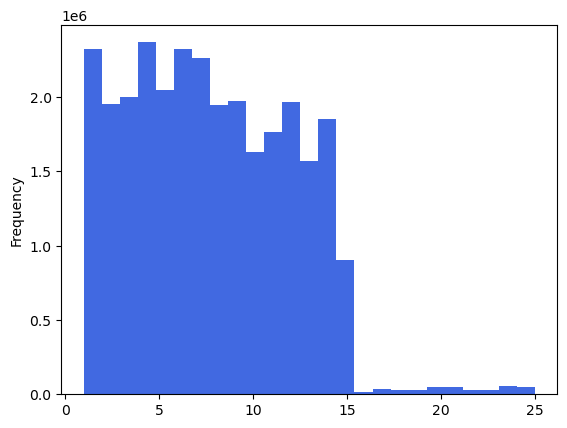

In [24]:
# Display histogram of prices
hist = df_exclusion['prices'].plot.hist(bins = 25, color = 'royalblue')

In [25]:
df_exclusion['prices'].describe()

count    2.926639e+07
mean     7.791568e+00
std      4.241156e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

### Customer Profiling

In [26]:
# Based on age
df_exclusion.loc[df_exclusion['age'] < 22, 'age_group'] = 'Youth'
df_exclusion.loc[df_exclusion['age'] >= 22,'age_group'] = 'Young Adult'
df_exclusion.loc[(df_exclusion['age'] >= 30) & (df_exclusion['age']< 60),'age_group'] = 'Adult'
df_exclusion.loc[df_exclusion['age'] >= 60,'age_group'] = 'Senior'

/var/folders/3d/n4rd9d4920lcv99lmvhn9ghr0000gp/T/ipykernel_53579/2449490098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[df_exclusion['age'] < 22, 'age_group'] = 'Youth'


In [27]:
df_exclusion['age_group'].value_counts(dropna = False)

age_group
Adult          13778563
Senior          9998947
Young Adult     3650672
Youth           1842756
Name: count, dtype: int64

In [28]:
# Based on income
df_exclusion.loc[df_exclusion['income'] < 60000, 'income_group'] = 'Low'
df_exclusion.loc[(df_exclusion['income'] >= 60000) & (df_exclusion['income']< 120000),'income_group'] = 'Middle'
df_exclusion.loc[df_exclusion['income'] >= 120000,'income_group'] = 'High'

/var/folders/3d/n4rd9d4920lcv99lmvhn9ghr0000gp/T/ipykernel_53579/3565109922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[df_exclusion['income'] < 60000, 'income_group'] = 'Low'


In [29]:
# check counts
df_exclusion['income_group'].value_counts(dropna = False)

income_group
Middle    15119028
High       8676806
Low        5475104
Name: count, dtype: int64

In [30]:
df_exclusion.count()

order_id                  29270938
user_id                   29270938
order_number              29270938
orders_day_of_week        29270938
order_hour_of_day         29270938
days_since_prior_order    27699512
product_id                29270938
add_to_cart_order         29270938
reordered                 29270938
product_name              29270938
aisle_id                  29270938
department_id             29270938
prices                    29266394
price_range_loc           29270938
busiest_day               29270938
busiest_days              29270938
busiest_period_of_day     29270938
max_order                 29270938
loyalty_flag              29270938
average_spend             29270938
spend_flag                29270938
order_frequency           29270938
frequency_flag            29270938
gender                    29270938
state                     29270938
age                       29270938
date_joined               29270938
n_dependants              29270938
fam_status          

In [31]:
# Determine whether there’s a difference in spending habits between income groups
crosstab_spend_income_group = pd.crosstab(df_exclusion['spend_flag'], df_exclusion['income_group'], dropna = False)

In [32]:
crosstab_spend_income_group.to_clipboard()

In [33]:
crosstab_spend_income_group

income_group,High,Low,Middle
spend_flag,,,
High_spender,78922,0,10536
Low_spender,8291229,5475104,15068447
Regular_spender,306655,0,40045


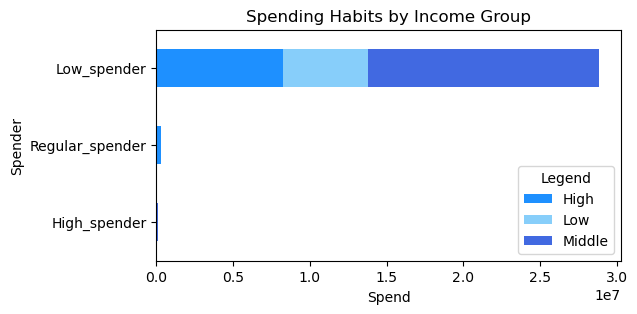

<Figure size 640x480 with 0 Axes>

In [38]:
# Sort the DataFrame by total spend across income groups
crosstab_spend_income_group_sorted = crosstab_spend_income_group.sum(axis=1).sort_values()
crosstab_spend_income_group_sorted = crosstab_spend_income_group.loc[crosstab_spend_income_group_sorted.index]

# Plot stacked bar chart horizontally
colors = ['dodgerblue', 'lightskyblue', 'royalblue']
ax = crosstab_spend_income_group_sorted.plot(kind='barh', stacked=True, figsize=(6, 3), color=colors)  # specify figsize for horizontal chart
plt.title('Spending Habits by Income Group')
plt.xlabel('Spend')
plt.ylabel('Spender')

# Move legend to the bottom right
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), title='Legend')

plt.show()

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_spend_income_group.png'))

In [35]:
# What time of the day do patrons order the most?
crosstab_spend_hour = pd.crosstab(df_exclusion['order_hour_of_day'], df_exclusion['price_range_loc'], dropna = False)

In [42]:
crosstab_spend_hour.to_clipboard()

In [43]:
crosstab_spend_hour

price_range_loc,High Price Range,Low Price Range,Mid Price Range
order_hour_of_day,,,
0,2487,105997,88008
1,1271,55845,46356
2,827,33362,27486
3,561,24410,20435
4,611,25295,21169
5,958,42826,36081
6,3449,143543,119037
7,10724,439440,365081
8,20006,850466,697875


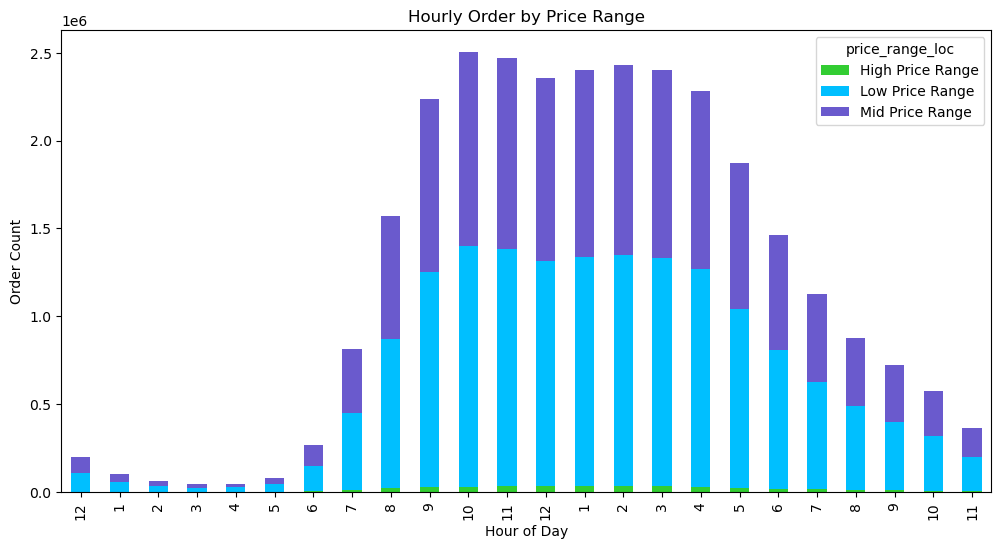

In [44]:
# Plot stacked bar chart
colors = ['limegreen', 'deepskyblue', 'slateblue']
ax = crosstab_spend_hour.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Define new labels for x-axis
new_x_labels_time = ['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
# Set new x-axis labels
ax.set_xticklabels(new_x_labels_time)

plt.title('Hourly Order by Price Range')
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_spend_hour.png'))
plt.show()

In [45]:
# Determine Patron's spending habits by region
crosstab_spend_region = pd.crosstab(df_exclusion['region'], df_exclusion['spend_flag'], dropna = False)

In [46]:
crosstab.to_clipboard()

In [47]:
crosstab_spend_region

spend_flag,High_spender,Low_spender,Regular_spender
region,,,
Midwest,21587,6751635,86633
Northeast,15801,5103743,58500
South,30799,9601287,114844
West,21271,7378115,86723


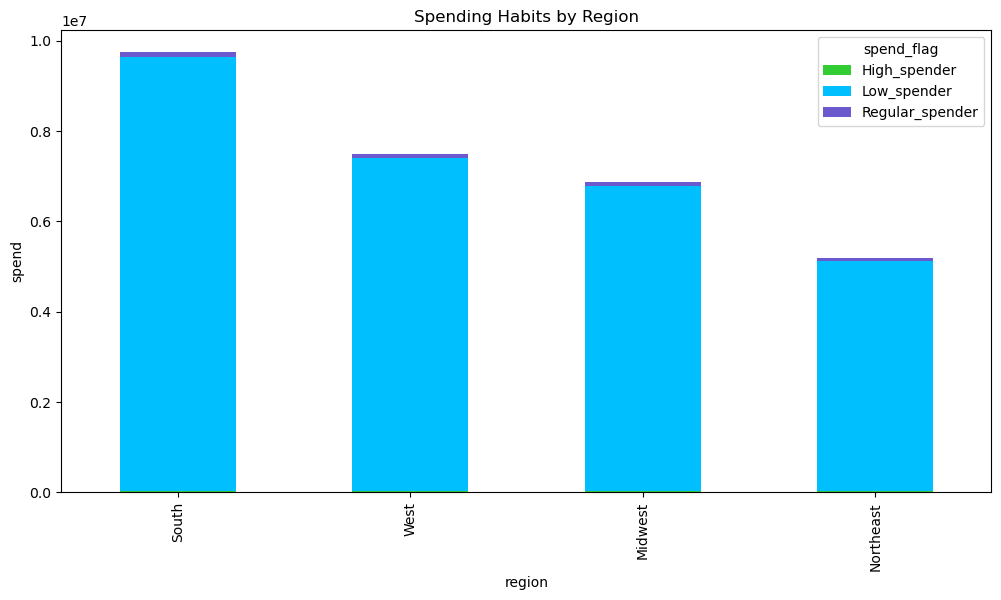

In [48]:
# Sort the DataFrame by total spend across regions
sorted_df = crosstab_spend_region.sum(axis=1).sort_values(ascending=False)
sorted_df = crosstab_spend_region.loc[sorted_df.index]

# Plot stacked bar chart
sorted_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Spending Habits by Region')
plt.xlabel('region')
plt.ylabel('spend')

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_spend_region.png'))

In [49]:
# by Age_group
df_exclusion['age_group'].value_counts(dropna = False)

age_group
Adult          13778563
Senior          9998947
Young Adult     3650672
Youth           1842756
Name: count, dtype: int64

In [50]:
# by family status
df_exclusion['fam_status'].value_counts(dropna = False)

fam_status
married                             20553278
single                               4801897
divorced/widowed                     2510623
living with parents and siblings     1405140
Name: count, dtype: int64

In [51]:
# by Number of dependents
df_exclusion['n_dependants'].value_counts(dropna = False)

n_dependants
3    7338095
2    7318645
0    7312520
1    7301678
Name: count, dtype: int64

In [52]:
# by Region
df_exclusion['region'].value_counts(dropna = False)

region
South        9746930
West         7486109
Midwest      6859855
Northeast    5178044
Name: count, dtype: int64

In [53]:
# by spend flag
df_exclusion['spend_flag'].value_counts(dropna = False)

spend_flag
Low_spender        28834780
Regular_spender      346700
High_spender          89458
Name: count, dtype: int64

In [54]:
# by day of the week, Saturday is day 0
df_exclusion['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5585707
1    5120353
6    4053682
5    3813720
2    3805426
3    3466482
4    3425568
Name: count, dtype: int64

In [55]:
# by order_hour_of_day
df_exclusion['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2503923
11    2471267
14    2428998
13    2402774
15    2399948
12    2358259
16    2283601
9     2235231
17    1874893
8     1568347
18    1463611
19    1128949
20     878598
7      815245
21     721872
22     573312
23     362096
6      266029
0      196492
1      103472
5       79865
2       61675
4       47075
3       45406
Name: count, dtype: int64

In [56]:
# by department_id  
df_exclusion['department_id'].value_counts(dropna = False)

department_id
4     8586351
16    4892140
19    2616075
7     2430657
1     2006425
13    1683753
3     1059826
15     956832
20     948799
9      777804
17     660042
12     639068
14     632755
11     399661
18     387739
6      242099
5      137942
8       87853
21      61282
2       32275
10      31560
Name: count, dtype: int64

In [57]:
# by price_range_loc
df_exclusion['price_range_loc'].value_counts(dropna = False)

price_range_loc
Low Price Range     15910072
Mid Price Range     12983995
High Price Range      376871
Name: count, dtype: int64

In [58]:
# by busiest day
df_exclusion['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy    20259663
Busiest day        5585707
Slowest day        3425568
Name: count, dtype: int64

In [59]:
# by busiest days
df_exclusion['busiest_days'].value_counts(dropna = False)

busiest_days
Regularly busy    11672828
Busiest days      10706060
Slowest days       6892050
Name: count, dtype: int64

In [60]:
# by loyalty_flag
df_exclusion['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Loyal customer      13410522
Regular customer    11317058
New customer         4543358
Name: count, dtype: int64

In [61]:
# by frequency_flag
df_exclusion['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent customer        20026966
Regular customer          6501809
Non-Frequent customer     2742163
Name: count, dtype: int64

In [62]:
# by income_group
df_exclusion['income_group'].value_counts(dropna = False)

income_group
Middle    15119028
High       8676806
Low        5475104
Name: count, dtype: int64

In [63]:
# Determine the frequency of orders by family status
crosstab_frequency = pd.crosstab(df_exclusion['frequency_flag'], df_exclusion['fam_status'], dropna = False)

In [64]:
crosstab_frequency.to_clipboard()

In [65]:
crosstab_frequency

fam_status,divorced/widowed,living with parents and siblings,married,single
frequency_flag,,,,
Frequent customer,1730463,976876,14060191,3259436
Non-Frequent customer,228254,131548,1932355,450006
Regular customer,551906,296716,4560732,1092455


In [66]:
# Determine shopping habits by fam_status, by orders_day_of_week 
crosstab_pref_day = pd.crosstab(df_exclusion['orders_day_of_week'], df_exclusion['fam_status'], dropna = False)

In [67]:
crosstab_pref_day.to_clipboard()

In [68]:
crosstab_pref_day

fam_status,divorced/widowed,living with parents and siblings,married,single
orders_day_of_week,,,,
0,475927,266323,3925400,918057
1,437024,247740,3583664,851925
2,325440,182347,2675790,621849
3,298590,165291,2434429,568172
4,291364,163853,2405329,565022
5,332025,185145,2670899,625651
6,350253,194441,2857767,651221


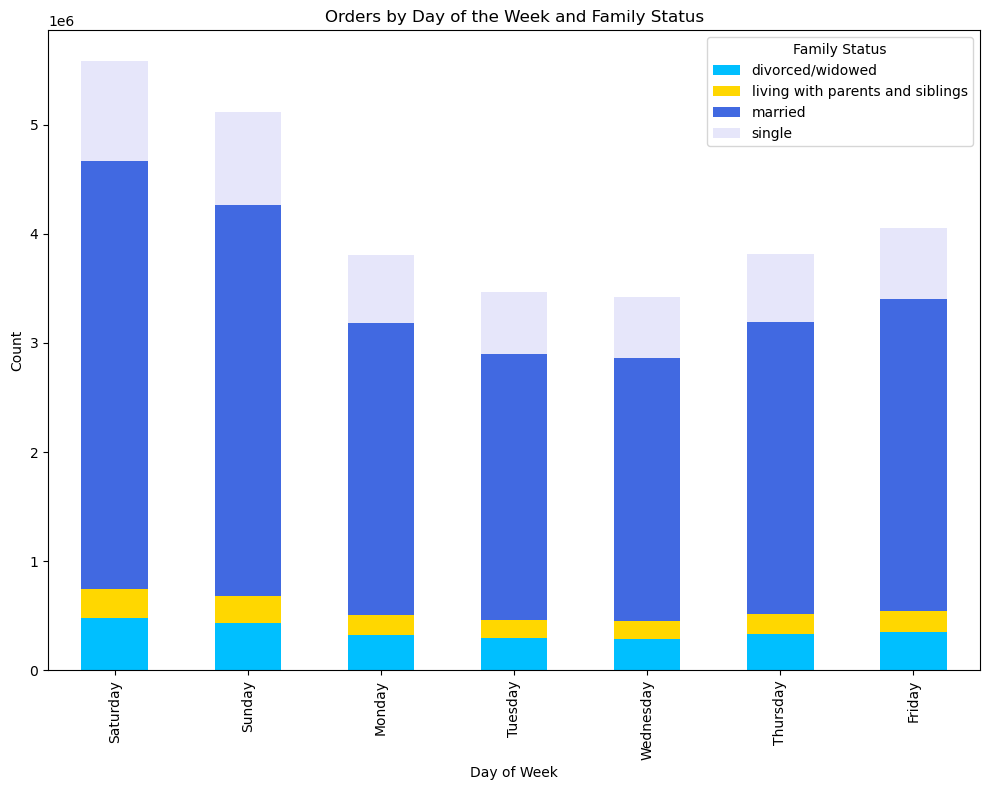

In [69]:
# Sort the DataFrame by the total frequency of orders in each price range
crosstab_pref_day_sorted = crosstab_pref_day.sum(axis=1)
crosstab_pref_day_sorted = crosstab_pref_day.loc[crosstab_pref_day_sorted.index]

# Plot stacked bar chart with sorted DataFrame
colors = ['deepskyblue', 'gold', 'royalblue', 'lavender']
ax_pref_day = crosstab_pref_day_sorted.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors)

# Define new labels for x-axis
new_x_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']  
# Set new x-axis labels
ax_pref_day.set_xticklabels(new_x_labels)

# Set titles and labels
plt.title('Orders by Day of the Week and Family Status')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Family Status')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_pref_day.png'))


In [70]:
# Determine shopping habits by fam_status, by order_hour_of_day 
crosstab_pref_hour = pd.crosstab(df_exclusion['order_hour_of_day'], df_exclusion['fam_status'], dropna = False)

In [71]:
crosstab_pref_hour.to_clipboard()

In [72]:
crosstab_pref_hour

fam_status,divorced/widowed,living with parents and siblings,married,single
order_hour_of_day,,,,
0,15094,10139,138040,33219
1,8068,5257,73032,17115
2,5691,3278,42686,10020
3,4127,2388,31306,7585
4,3707,2637,33123,7608
5,7233,4040,55917,12675
6,22405,13831,185247,44546
7,73124,40044,568143,133934
8,135499,72050,1104116,256682


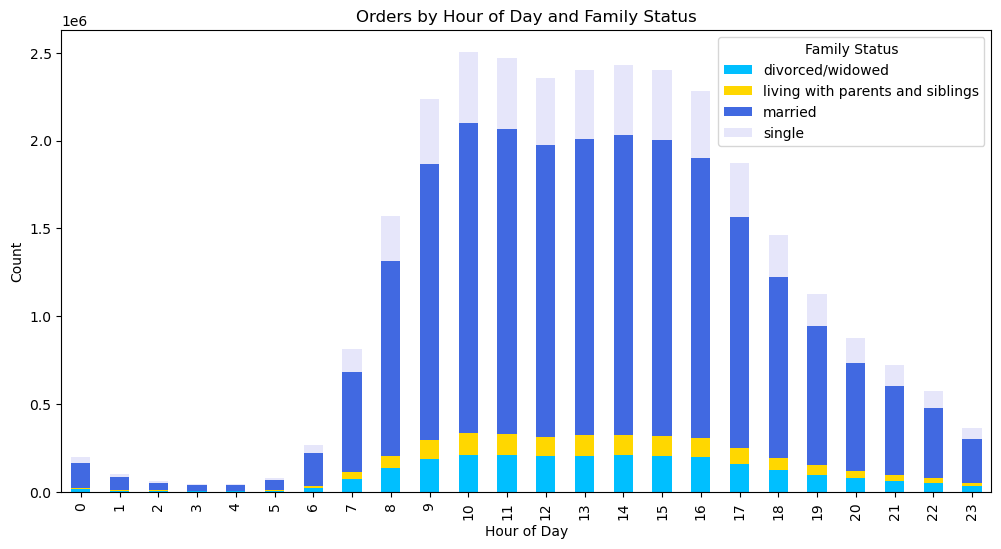

In [73]:
# Plot stacked bar chart
colors = ['deepskyblue', 'gold', 'royalblue', 'lavender']
crosstab_pref_hour.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Orders by Hour of Day and Family Status')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Family Status')

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_pref_hour.png'))


In [74]:
plt.show()

In [75]:
# Determine shopping habits by hour of day and department_id 
crosstab_dept_hour_pref = pd.crosstab(df_exclusion['order_hour_of_day'], df_exclusion['department_id'], dropna = False)

In [76]:
crosstab_dept_hour_pref.to_clipboard()

In [77]:
crosstab_dept_hour_pref

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,13969,214,6550,61497,443,1689,15733,597,5251,217,...,4226,12213,3895,6478,31252,4475,2186,15972,6221,498
1,7918,118,3384,31412,273,920,9019,398,2720,105,...,2150,6488,2083,3458,15860,2581,1016,8226,3296,285
2,4759,108,2144,17893,228,522,5524,239,1609,61,...,1373,3965,1230,2117,9490,1656,572,4956,2012,153
3,3670,63,1588,12749,169,428,4137,237,1153,46,...,977,2819,934,1523,7152,1276,411,3718,1446,116
4,3726,59,1683,13593,165,398,4251,253,1291,42,...,1037,2903,976,1577,7118,1415,488,3609,1456,133
5,5826,93,2791,24625,251,653,6720,286,1951,73,...,1666,4469,1685,2595,13036,2072,1026,6033,2529,160
6,17609,284,9845,80237,600,2024,21051,907,6880,304,...,5719,14501,6226,8136,47119,6159,4492,21444,8175,544
7,51912,830,31196,247255,1925,5839,62572,2261,21214,857,...,17860,43706,19596,24469,145772,18774,15412,66211,24918,1705
8,95564,1642,58071,467851,4826,11465,127745,4124,39100,1663,...,33692,85194,36986,48341,280153,35816,26492,137491,48405,3069


In [78]:
# Determine shopping habits by fam_status, by price_range_loc 
crosstab_fam_spend_pref = pd.crosstab(df_exclusion['price_range_loc'], df_exclusion['fam_status'], dropna = False)

In [79]:
crosstab_fam_spend_pref.to_clipboard()

In [80]:
crosstab_fam_spend_pref

fam_status,divorced/widowed,living with parents and siblings,married,single
price_range_loc,,,,
High Price Range,32504,18064,266460,59843
Low Price Range,1361374,760817,11174730,2613151
Mid Price Range,1116745,626259,9112088,2128903


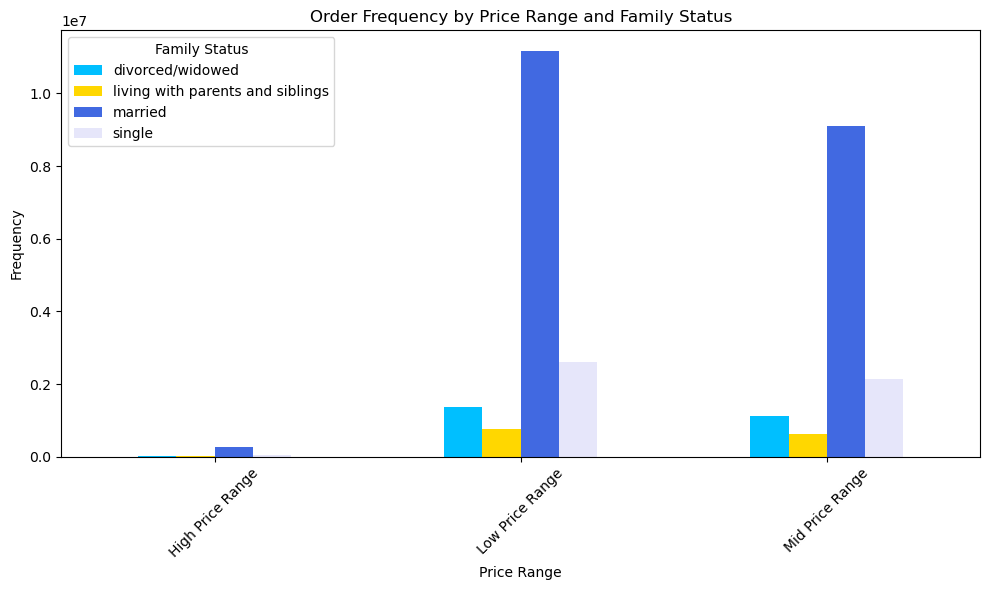

In [81]:
# Plot grouped bar chart
colors = ['deepskyblue', 'gold', 'royalblue', 'lavender']
crosstab_fam_spend_pref.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Order Frequency by Price Range and Family Status')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.legend(title='Family Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_fam_pricerange.png'))

In [82]:
# Display the plot
plt.show()

In [83]:
# Determine shopping habits by age_group, by frequency_flag
crosstab_age_frequency = pd.crosstab(df_exclusion['age_group'], df_exclusion['frequency_flag'], dropna = False)

In [84]:
crosstab_age_frequency.to_clipboard()

In [85]:
crosstab_age_frequency

frequency_flag,Frequent customer,Non-Frequent customer,Regular customer
age_group,,,
Adult,9405899,1297001,3075663
Senior,6856591,933372,2208984
Young Adult,2502641,335585,812446
Youth,1261835,176205,404716


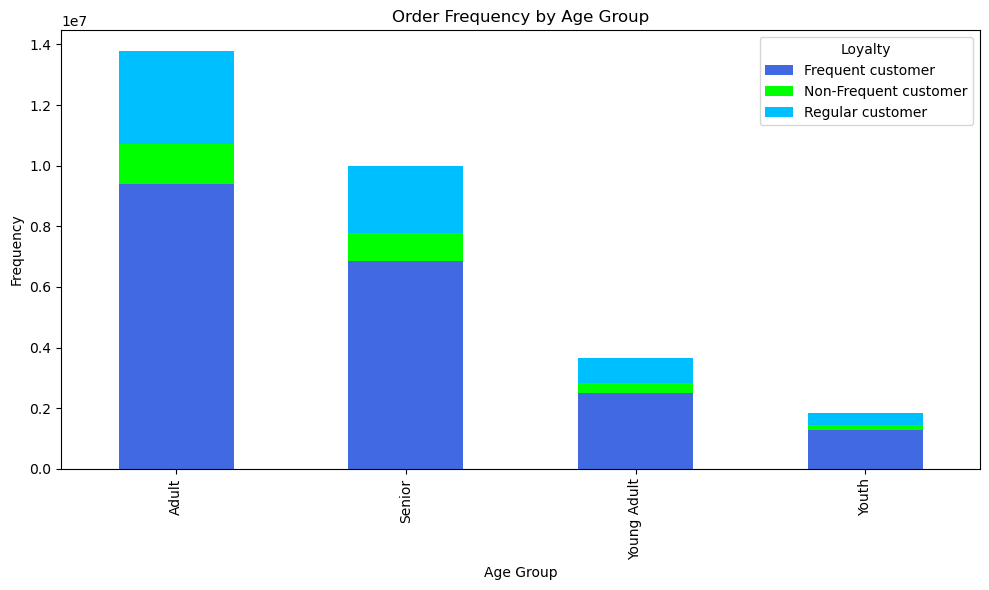

In [86]:
# Sort the DataFrame by the total frequency of orders in each price range
crosstab_age_frequency_sorted = crosstab_age_frequency.sum(axis=1).sort_values(ascending=False)
crosstab_age_frequency_sorted = crosstab_age_frequency.loc[crosstab_age_frequency_sorted.index]

# Plot stacked bar chart with sorted DataFrame
colors = ['royalblue', 'lime', 'deepskyblue']
crosstab_age_frequency_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Order Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Loyalty')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_age_frequency.png'))


In [87]:
# Display the plot
plt.show()

In [88]:
# Determine shopping habits by age_group, by department_id
crosstab_age_dept = pd.crosstab(df_exclusion['department_id'], df_exclusion['age_group'], dropna = False)

In [89]:
crosstab_age_dept.to_clipboard()

In [90]:
crosstab_age_dept

age_group,Adult,Senior,Young Adult,Youth
department_id,,,,
1,941535,688334,249058,127498
2,14926,10865,4227,2257
3,499957,361256,131944,66669
4,4042525,2937565,1069556,536705
5,66116,44873,16912,10041
6,114085,81589,30677,15748
7,1143834,836098,299486,151239
8,40677,29958,10598,6620
9,365406,264717,98325,49356


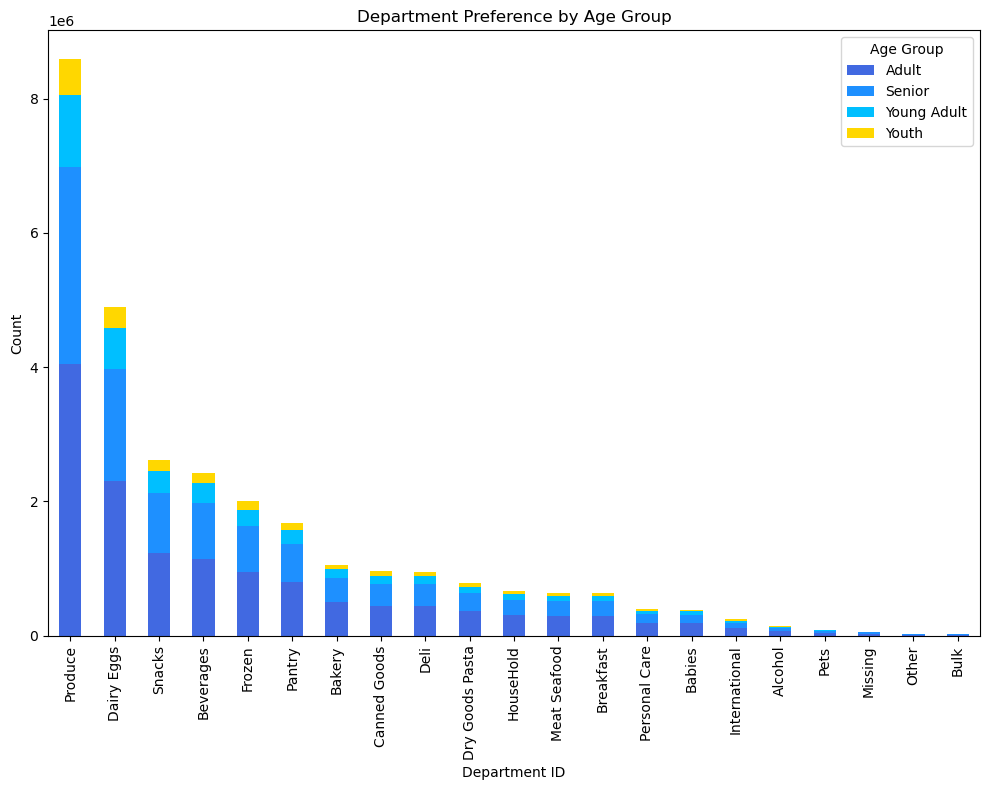

In [91]:
# Sort the DataFrame by the total frequency of orders in each price range
crosstab_age_dept_sorted = crosstab_age_dept.sum(axis=1).sort_values(ascending=False)
crosstab_age_dept_sorted = crosstab_age_dept.loc[crosstab_age_dept_sorted.index]

# Plot stacked bar chart with sorted DataFrame
colors = ['royalblue', 'dodgerblue', 'deepskyblue', 'gold']
ax = crosstab_age_dept_sorted.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors)

# Define new labels for x-axis
new_x_labels = ['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry', 'Bakery', 'Canned Goods', 'Deli', 'Dry Goods Pasta', 'HouseHold', 'Meat Seafood', 'Breakfast', 'Personal Care', 'Babies', 'International', 'Alcohol', 'Pets', 'Missing', 'Other', 'Bulk']  # Replace with your desired labels

# Set new x-axis labels
ax.set_xticklabels(new_x_labels)

# Set titles and labels
plt.title('Department Preference by Age Group')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_age_dept.png'))

In [92]:
# Determine shopping habits by age_group, and family status
crosstab_age_fam_status = pd.crosstab(df_exclusion['age_group'], df_exclusion['fam_status'], dropna = False)

In [93]:
crosstab_age_fam_status.to_clipboard()

In [94]:
crosstab_age_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Adult,0,0,10332440,3446123
Senior,2510623,0,7488324,0
Young Adult,0,0,2732514,918158
Youth,0,1405140,0,437616


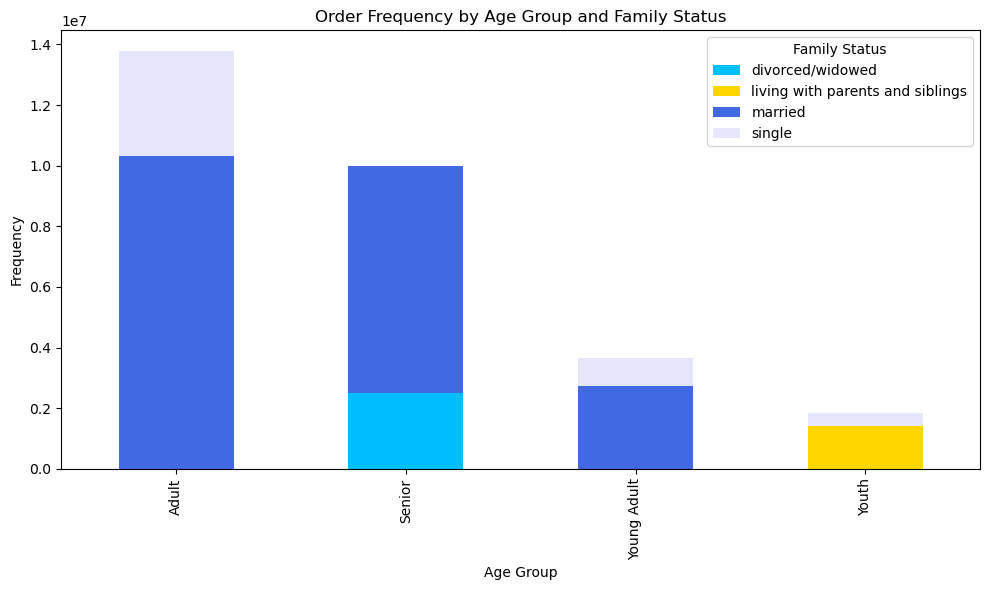

In [95]:
# Sort the DataFrame by the total frequency of orders in each price range
crosstab_age_fam_status_sorted = crosstab_age_fam_status.sum(axis=1).sort_values(ascending=False)
crosstab_age_fam_status_sorted = crosstab_age_fam_status.loc[crosstab_age_fam_status_sorted.index]

# Plot stacked bar chart with sorted DataFrame
colors = ['deepskyblue', 'gold', 'royalblue', 'lavender']
crosstab_age_fam_status_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Order Frequency by Age Group and Family Status')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Family Status')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_crosstab_age_fam_status.png'))

## Export dataframe

In [99]:
# Export df_exclusion (datafrane with exclusion flag applied)
df_exclusion.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_cust_profile_high_activity.pkl'))

In [100]:
# Export instacart (dataframe without exclusion, includes all activities, both high and low activity)
instacart.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_cust_profile_all_activity.pkl'))